# Neural Networks & Intelligent Computer Systems
## **Exercise 1**. Supervised Learning: Classification

---
Christos Dimopoulos - 03117037 <br />
Dimitris Dimos - 03117165 <br />
Team No. 01

---

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

# import scikit-learn models
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
# Import classes for preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Μέρος 1. UCI dataset

## Εισαγωγή και Επισκόπηση

Σε πρώτο στάδιο, εισάγουμε το σύνολο δεδομένων **U05 (HCC Survival Data Set)** της UCI, το οποίο αφορά σε δεδομένα Hepatocellular Καρκινωμάτων του ήπατος και συλλέχθει σε Πανεπιστημειακό Νοσοκομείο της Πορτογαλίας. Περιλαμβάνει αληθινά κλινικά δεδομένα από 165 ασθενείς που διαγνώστηκαν με HCC. Δεν χρειάζεται κάποια προεργασία στο .txt αρχείο εισόδου (πχ concatenation), γι'αυτό απλώς φορτώνουμε το dataset.



In [ ]:
# Read Dataset
df = pd.read_csv("hcc-data.txt", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,0,1,0,0,0,0,1,0,1,1,?,1,0,0,0,0,1,0,0,0,0,1,67,137,15,0,1,1,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0,?,0,1,1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50,50,2,1,2,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40,30,0,1,1,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100,30,0,1,1,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,1,?,?,?,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,40,?,?,0,1,1,0.84,?,15.4,109.2,9.3,184000,4.6,0.5,35,40,449,109,7.6,0.7,5,3,?,?,?,?,1
161,0,1,0,?,?,?,?,1,0,0,0,0,0,1,0,?,0,1,1,1,0,0,1,68,0,0,2,1,1,1.33,4887,12.1,88.9,2.5,141,3,3.6,50,91,147,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,1,0,1,0,0,0,0,1,0,1,1,1,0,1,1,0,?,?,?,?,0,0,1,65,?,48,0,1,1,1.13,75,13.3,90,8,385000,4.3,0.6,53,52,164,181,7.5,1.46,5,18.6,?,?,?,?,1
163,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0,?,?,?,1,1,1,44,?,?,2,1,1,2.14,94964,15.6,117.3,5200,118000,4.8,1.1,50,60,320,170,8.4,0.74,5,18,?,?,?,?,0


**Πλήθος Δειγμάτων**: 165 \\
**Πλήθος Features ανά Δείγμα**: 49 (+1 για το label) \\
Σημειώνεται, επίσης, ότι πρόκειται για ένα **ετερογενές σύνολο δεδομένων**, καθώς περιλαμβάνει 23 ποσοστικές μεταβλητές και 26 ποιοτικές μεταβλητές ανά δείγμα. Τα features του κάθε δείγματος αναγράφονται παρακάτω με τη σειρά των κολώνων:
- Gender: nominal
- Symptoms: nominal
- Alcohol: nominal
- Hepatitis B Surface Antigen: nominal
- Hepatitis B e Antigen: nominal
- Hepatitis B Core Antibody: nominal
- Hepatitis C Virus Antibody: nominal
- Cirrhosis : nominal
- Endemic Countries: nominal
- Smoking: nominal
- Diabetes: nominal
- Obesity: nominal
- Hemochromatosis: nominal
- Arterial Hypertension: nominal
- Chronic Renal Insufficiency: nominal
- Human Immunodeficiency Virus: nominal
- Nonalcoholic Steatohepatitis: nominal
- Esophageal Varices: nominal
- Splenomegaly: nominal
- Portal Hypertension: nominal
- Portal Vein Thrombosis: nominal
- Liver Metastasis: nominal
- Radiological Hallmark: nominal
- Age at diagnosis: integer
- Grams of Alcohol per day: continuous
- Packs of cigarets per year: continuous
- Performance Status: ordinal
- Encefalopathy degree: ordinal
- Ascites degree: ordinal
- International Normalised Ratio: continuous
- Alpha-Fetoprotein (ng/mL): continuous
- Haemoglobin (g/dL): continuous
- Mean Corpuscular Volume (fl): continuous
- Leukocytes(G/L): continuous
- Platelets (G/L): continuous
- Albumin (mg/dL): continuous
- Total Bilirubin(mg/dL): continuous
- Alanine transaminase (U/L): continuous
- Aspartate transaminase (U/L): continuous
- Gamma glutamyl transferase (U/L): continuous
- Alkaline phosphatase (U/L): continuous
- Total Proteins (g/dL): continuous
- Creatinine (mg/dL): continuous
- Number of Nodules: integer
- Major dimension of nodule (cm): continuous
- Direct Bilirubin (mg/dL): continuous
- Iron (mcg/dL): continuous
- Oxygen Saturation (%): continuous
- Ferritin (ng/mL): continuous
- Class: nominal (1 if patient survives, 0 if patient died) 


Σημειώνεται ότι τα features στις κολώνες 0-22 είναι **nominal**. Παρατηρούμε ότι η **γραμμές του dataset είναι αριθμημένες** από το 0 έως το 164 (συνολικά για τα 165 samples). Κάθε κολώνα έχει ως **επικεφαλίδα** έναν αριθμό, ο οποίος κυμαίνεται από 0 έως 49: για τα 49 features κάθε δείγματος και επιπλέον 1 για την ετικέτα του.

Οι ετικέτες των δειγμάτων βρίσκονται στην **τελευταία κολώνα**. Πρόκειται για ένα δυαδικό πρόβλημα κατηγοριοποίησης που αφορά στην επιβίωση ή μη των ασθενών σε διάστημα 1 χρόνου και για το οποίο ακολουθούμε τον εξής συμβολισμό: \\
- Με 0 σημειώνουμε τους ασθενείς που πέθαναν από την ασθένεια.
- Με 1 σημειώνουμε τους ασθενείς που επιβίωσαν.

Επιπλέπν, **υπάρχουν απουσιάζουσες τιμές**, οι οποίες αποτελούν το **10.22%** του συνόλου του dataset. Μόνο 8 ασθενείς - samples έχουν καταγεγραμμένα και τα 49 πεδία των features τους από όλο το dataset (4.85%).

Όπως αναφέρθηκε, το πλήθος των κλάσεων στο εν λόγω πρόβλημα κατηγοριοποίησης είναι 2 (**binary classification problem**). Συνολικά, 63 δείγματα - ασθενείς έχουν την **ετικέτα 0** (θάνατος), δηλαδή ποσοστό 38.18% επί του συνόλου, και 102 δείγματα - ασθενείς έχουν την **ετικέτα 1** (επιβίωση), δηλαδή ποσοστό 61.82% επί του συνόλου. Το εν λόγω dataset, λοιπόν, θεωρείται **unbalanced** με περισσότερα δείγματα στην κατηγορία 1.

## Προετοιμασία

Ως πρώτο στάδιο προεργασίας, καλούμαστε να διαχειριστούμε τις απουσιάζουσες τιμές (με ένδειξη ?) στο δοθέν dataset. Προκειμένου να το καταφέρουμε αυτό, αφού τις επισημειώσουμε ως NaN, εργαζόμαστε ανάλογα με το είδος του κάθε feature:
- Για **continuous και integer variables** αντικαθιστούμε τις ΝaΝ τιμές με τη median τιμή όσων εμφανίζονται στην ίδια κολώνα. Μέσω αυτής της τεχνικής, δεν λαμβάνουμε υπόψη πιθανά outliers ενώ διαχειριζόμαστε καλύτερα skewed κατανομές τιμών της ίδιας μεταβλητής.
- Για **nominal και ordinal variables** αντικαθιστούμε τις NaN τιμές με την πιο συχνά εμφανιζόμενη τιμή της εκάστοτε κολώνας. \\

Σημειώνεται ότι η τακτική διαγραφής σειρών ή/και στηλών με missing values δεν συμφέρει στην προκειμένη περίπτωση, καθώς όπως αναφέρθηκε μόνο 8 δείγματα-ασθενείς εκ των 165 δεν έχουν κανένα missing value, οπότε το dataset θα εκφυλλιζόταν.

In [ ]:
# First, define the indexes for each type of variables
continuous_feats_idx = [24,25, *range(29,43), *range(44,49)]
integer_feats_idx = [23, 43]
nominal_feats_ids = [*range(0,23)]
ordinal_feats_idx = [26, 27, 28]

In [ ]:
updated_df = df
updated_df = updated_df.replace('?', np.nan) # replace '?' symbols with NaN value

# Continuous & Integer Variables: Replace with median of column
for i in continuous_feats_idx+integer_feats_idx:
  updated_df[i]=pd.to_numeric(updated_df[i]).fillna(pd.to_numeric(updated_df[i]).median())

# Nominal & Ordinal Variables: Replace with most common value of column
for i in nominal_feats_ids+ordinal_feats_idx:
  updated_df[i]=pd.to_numeric(updated_df[i]).fillna(updated_df[i].value_counts().idxmax())

updated_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,67,137.0,15.0,0,1,1,1.53,95.0,13.70,106.60,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.10,0.70,1.0,3.5,0.5,83.0,27.0,295.0,1
1,0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0.0,0.0,0,1,1,1.30,33.0,13.05,94.95,7.2,93000.0,3.4,1.4,50.0,71.0,179.5,162.0,7.05,0.85,1.0,1.8,0.7,83.0,27.0,295.0,1
2,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50.0,50.0,2,1,2,0.96,5.8,8.90,79.80,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.00,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40.0,30.0,0,1,1,0.95,2440.0,13.40,97.10,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.10,1.11,2.0,15.7,0.2,83.0,27.0,295.0,0
4,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100.0,30.0,0,1,1,0.94,49.0,14.30,95.10,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.90,1.80,1.0,9.0,0.7,59.0,15.0,22.0,1


Ακολούθως, αφού ξεχωρίσουμε το σύνολο δεδομένων σε δύο σύνολα των features και labels αντίστοιχα και τα μετατρέψουμε σε numpy.arrays, προβαίνουμε στον **διαχωρισμό του συνόλου δεδομένων** σε σύνολο εκπαίδευσης (**train set**) και σύνολο (**test set**) με 30% των δειγμάτων στο test set.

In [ ]:
labels_df = updated_df.iloc[:, [-1]] # labels of each sample are in the last column
features_df = updated_df.iloc[:, 0:-1] # features of each sample are columns 0-48

# convert to numpy arrays
np_features = features_df.values
np_labels = labels_df.values

# Train - Test split 70/30
X_train, X_test, y_train, y_test = train_test_split(np_features, np_labels, test_size=0.3)

# Convert to float
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (115, 49)
X_test shape:  (50, 49)


Σημειώνεται ότι για το εν λόγω dataset δεν χρειάζεται κάποια ειδική διαχείριση κατηγορικών ή/και μη διατεταγμένων χαρακτηριστικών.

## Ταξινόμηση

### *Ταξινομητές*
Στο UCI θα μελετήσουμε τους ταξινομητές

- dummy,
- Gaussian Naive Bayes (GNB),
- KNeirestNeighbors (kNN), και
- Logistic Regression (LR).

### *Μετρικές*
Η βελτιστοποίηση και η παρουσίαση των αποτελεσμάτων κάθε φορά θα γίνεται ξεχωριστά για δύο μετρικές:

- Ορθότητα (accuracy), και
- F1-score (όχι macro καθώς δεν είναι multiclass πρόβλημα).

### *Σχήμα διασταυρούμενης επικύρωσης*
Για όλα τα πειράματα θα χρησιμοποιήσουμε 10-fold cross-validation.

### **Επίδοση out-of-the-box**
Αρχικά θα δούμε πως συμπεριφέρονται οι ταξινομητές χωρίς καμία βελτιστοποίηση (out-of-the-box) και με όλες τις παραμέτρους σε **default τιμές**. Εκπαιδεύουμε όλους τους εκτιμητές και υπολογίζουμε την επίδοσή τους στο test set για τις δύο μετρικές.

In [ ]:
estimators = [DummyClassifier(), GaussianNB(), KNeighborsClassifier(), LogisticRegression()]

accuracies = []
f1_scores = []
# Evaluate default models
for model in estimators:
  model.fit(X_train, y_train) # train model
  predictions = model.predict(X_test)
  acc = model.score(X_test, y_test)
  f1 = sklearn.metrics.f1_score(y_test, predictions, average = 'weighted')
  accuracies.append(acc)
  f1_scores.append(f1)

In [ ]:
# Show results
print('Accuracy per model: ', accuracies)
print('F1 metric per model: ', f1_scores)

Accuracy per model:  [0.52, 0.6, 0.56, 0.72]
F1 metric per model:  [0.5220420420420421, 0.5602941176470587, 0.5163235294117646, 0.7063888888888888]


Παρατίθεται σε markdown πίνακας με τις επιδόσεις του κάθε ταξινομητή ως προς τις δύο μετρικές και bar plots. \\
 **ΠΡΟΣΟΧΗ**: Οι τιμές που φαίνονται παραπάνω μπορεί να διαφέρουν ελάχιστα με τις τιμές που αναγράφονται στον πίνακα, για διαφορετικές εκτελέσεις του κώδικα, λόγω της στοχαστικής φύσης της μεθόδου cross-validation. 


| **Estimator** | **Accuracy (%)** | **F1 Metric (%)** |
| :------------------: |:------------------------------------------: | :-----------: |
| Dummy Classifier         | 52 | 52.20 |
| Naive Bayes Classifier   | 60 | 56.02 |
| K-Nearest Neighbors      | 56 | 51.63 |
| **Logistic Regression**      | **72** | **70.64** |


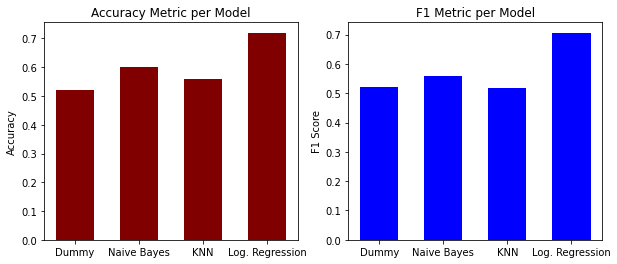

In [ ]:
# Create Bar Plots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
model_labels = ['Dummy', 'Naive Bayes', 'KNN', 'Log. Regression']
ax1.bar(model_labels, accuracies, color ='maroon',
        width = 0.6)
 
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy Metric per Model")

ax2.bar(model_labels, f1_scores, color ='blue',
        width = 0.6)
 
ax2.set_ylabel("F1 Score")
ax2.set_title("F1 Metric per Model")
plt.show()

Επομένως, παρατηρούμε ότι και για τις δύο μετρικές αξιολόγησης (accuracy & F1) τα καλύτερα αποτελέσματα δίνονται από τον εκτιμητή **Logistic Regression**, με τον Naive Bayes να έπεται. Η υπεροχή αυτή του LR Classifier έναντι του NB οφείλεται εν μέρει στο γεγονός ότι τα features δεν είναι μεταξύ τους πλήρως ανεξάρτητα, όπως υποθέτει δηλαδή o δεύτερος. Επιπλέον, συμφέρει ότι πρόκειται για Binary Classification Problem. Τέλος, όσον αφορά τον ΚΝΝ Classifier βλέπουμε ότι έχει τις χαμηλότερες επιδόσεις ανάμεσα στους 3 εκτιμητές (εξαιρουμένου προφανώς του Dummy Classifier, που λειτουργεί ως Baseline), ενώ στα μειονεκτήματα του προστίθεται και ο υψηλότερος χρόνος εκτέλεσης του στο inference time.

### **Βελτιστοποίηση**

Ως επόμενο στάδιο, για κάθε έναν από τους ταξινομητές βελτιστοποιούμε την επίδοσή τους μέσω των διαδικασιών: 
- προεπεξεργασίας
- ορισμού pipelines και
- εύρεσης βέλτιστων υπερμαραμέτρων με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση

#### Προεπεξεργασία Δεδομένων
Στο στάδιο αυτό, ορίζουμε μετασχηματιστές για την προεπεξεργασία των δεδομένων, με στόχο τη βελτιστοποίηση της επίδοσης των εκτιμητών. Ειδικότερα, ορίζουμε τους εξής μετασχηματιστές:
- Έναν **Variance Thresholder** για τη μείωση των διαστάσεων εισόδου με επιλογή χαρακτηριστικών.
- Έναν **Standard Scaler** για την κανονικοποίηση των δεδομένων εισόδου, ώστε να ακολουθούν κανονική κατανομή Ν(0,1).
- Έναν **Random Oversampler** για την εξισορρόπηση του dataset εισόδου.
- Έναν μετασχηματιστή **PCA** για την εξαγωγή χαρακτηριστικών των δεδομένων εισόδου με στόχο τη μείωση της διαστατικότητας τους.

In [ ]:
# initialize transformers without any hyperparameters
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

#### Pipelines
Ορίζουμε ένα pipeline για κάθε έναν από τους εκτιμητές.

In [ ]:
# Create Baseline Estimators and Pipelines
estimators = [DummyClassifier(), GaussianNB(), KNeighborsClassifier(n_jobs=-1), LogisticRegression(n_jobs=-1)]

pipes = [] # :)
for i in range(len(estimators)):
  pipes.append(Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('estimator', estimators[i])], memory = 'tmp'))

**ΣΗΜΕΙΩΣΗ**: Στους ταξινομητές περιλαμβάνουμε χάριν πληρότητας και τον Dummy Classifier, γνωρίζοντας ωστόσο ότι η βελτιστοποίηση του δεν έχει κανένα απολύτως νόημα.

#### Βελτιστοποίηση με GridSearch & Cross-Validation

Αρχικά, προκειμένου να βρούμε *πιθανές τιμές κατωφλιοποίησης* για τον μετασχηματιση VarianceThreshold(), εξετάζουμε τις διασπορές των 49 features του dataset εισόδου.

In [ ]:
train_variance = X_train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[1.54706994e-01 2.26843100e-01 1.84196597e-01 7.93950851e-02
 8.62003781e-03 1.88582231e-01 1.74971645e-01 9.34593573e-02
 5.71644612e-02 2.31833648e-01 2.40000000e-01 1.06918715e-01
 4.94517958e-02 2.29413989e-01 1.13421550e-01 1.70888469e-02
 4.94517958e-02 1.88582231e-01 2.44536862e-01 2.00831758e-01
 1.37920605e-01 1.65141777e-01 2.26843100e-01 1.69662306e+02
 3.09878836e+03 2.54832507e+03 1.38253308e+00 1.95841210e-01
 4.13913043e-01 2.64356199e-01 5.56335778e+08 4.95100643e+00
 6.65515357e+01 7.92472652e+06 9.77395544e+09 4.80914405e-01
 2.17338488e+01 3.36882541e+03 7.99817890e+03 5.66722645e+04
 2.29642999e+04 1.21944368e+02 9.38075418e-01 3.10820416e+00
 1.92336413e+01 8.65261425e+00 1.53961356e+03 4.54524908e+02
 1.24080937e+05]
9773955444.372967


In [ ]:
vthreshold = [0, 0.15, 1, 10, 20] ## Hyperparameters for variance thresholding

Ομοίως, ορίζουμε ένα πεδίο τιμών για τις υπερπαραμέτρους για τη τεχνική PCA, λαμβάνοντας υπόψη ότι η διαστατικότητα του προβλήματος είναι $n = 49$.

In [ ]:
n_components = [10, 20, 30, 40] ## Hyperparameters for Principal Component Analysis

Τέλος, καλούμαστε να ρυθμίσουμε ένα πεδίο τιμών για τις υπερπαραμέτρους των διάφορων εκτιμητών

In [ ]:
# Dummy Classifier Hyperparameters
strategy = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant'] # is it really necessary for dummy?

# Gaussian NB Classifier Hyperparameters
var_smoothing = [1e-9, 1e-5, 1e-3, 1]

# KNN Classifier Hyperparameters
n_neighbors = [1, 3, 5, 7]
metric = ['euclidean', 'manhattan', 'minkowski', 'mahalanobis']

# Logistic Regression Hyperparameters
max_iter = [100, 200, 300]
penalty = ['l1', 'l2']
solver = ['lbfgs', 'liblinear']

### 1) Βελτιστοποίηση ως προς το **Accuracy**

Πρώτα, ορίζουμε τις κλάσεις των estimators, ώστε να γίνεται βελτιστοποίηση υπερπαραμέτρων με στόχο τη μεγιστοποίηση του accuracy.

In [ ]:
# Define GridSearch Estimators for each classifier
estimator_dummy = GridSearchCV(pipes[0], dict(selector__threshold=vthreshold,
                                              pca__n_components=n_components, estimator__strategy=strategy), cv=10, scoring='accuracy', n_jobs=-1)

estimator_nb = GridSearchCV(pipes[1], dict(selector__threshold=vthreshold,
                                              pca__n_components=n_components, estimator__var_smoothing=var_smoothing), cv=10, scoring='accuracy', n_jobs=-1)

estimator_knn = GridSearchCV(pipes[2], dict(selector__threshold=vthreshold,
                                            pca__n_components=n_components, estimator__n_neighbors=n_neighbors,
                                            estimator__metric=metric), cv=10, scoring='accuracy', n_jobs=-1)

estimator_lr = GridSearchCV(pipes[3], dict(selector__threshold=vthreshold,
                                           pca__n_components=n_components, estimator__max_iter=max_iter,
                                           estimator__penalty=penalty, estimator__solver=solver), cv=10, scoring='accuracy', n_jobs=-1)


Ακολούθως, κάνουμε fit στο σύνολο εκπαίδευσης τους άνωθι estimators και προσδιορίζουμε τις βέλτιστες υπερπαραμέτρους για κάθε pipelined classifier.

In [ ]:
# Find Optimal Hyperparameters for Dummy Classifier
estimator_dummy.fit(X_train, y_train)
best_dummy1 = estimator_dummy.best_estimator_
print(estimator_dummy.best_estimator_)
print(estimator_dummy.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=20)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('estimator',
                 DummyClassifier(constant=None, random_state=None,
                                 strategy='stratified'))],
         verbose=False)
{'estimator__strategy': 'stratified', 'pca__n_components': 10, 'selector__threshold': 20}


In [ ]:
# Find Optimal Hyperparameters for Gaussian NB Classifier
estimator_nb.fit(X_train, y_train)
best_nb1 = estimator_nb.best_estimator_
print(estimator_nb.best_estimator_)
print(estimator_nb.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('estimator', GaussianNB(priors=None, var_smoothing=1))],
         verbose=False)
{'estimator__var_smoothing': 1, 'pca__n_components': 20, 'selector__threshold': 0}


In [ ]:
# Find Optimal Hyperparameters for KNN Classifier
estimator_knn.fit(X_train, y_train)
best_knn1 = estimator_knn.best_estimator_
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.15)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('estimator',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=-1, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)
{'estimator__metric': 'manhattan', 'estimator__n_neighbors': 7,

In [ ]:
# Find Optimal Hyperparameters for LR Classifier
estimator_lr.fit(X_train, y_train)
best_lr1 = estimator_lr.best_estimator_
print(estimator_lr.best_estimator_)
print(estimator_lr.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l1',
                                    random_state=None, solver='libline

Στη συνέχεια, για το καλύτερο μοντέλο κάθε ταξινομητή, το εκπαιδεύουμε στο σύνολο του train set και εκτιμούμε την επίδοσή του στο test set. Επιπρόσθετα, για τα βέλτιστα μοντέλα, καταγράφουμε τους χρόνους train και test.

In [ ]:
def evaluate_best(estimator, X_train, X_test, y_train, y_test, metric='accuracy'):
  start_time = time.time()
  # fit on train dataset
  estimator.fit(X_train, y_train)
  train_time = time.time() - start_time

  # evauate on test dataset
  start_time = time.time()
  preds = estimator.predict(X_test)
  print(classification_report(y_test, preds))
  test_time = time.time() - start_time
  performance = classification_report(y_test, preds,output_dict='True')[metric]
  
  return performance, train_time, test_time

In [ ]:
best_estimators = [best_dummy1, best_nb1, best_knn1, best_lr1]
labels = ['Best Dummy Classifier', 'Best Gaussian NB Classifier', 'Best KNN Classifier', 'Best LR Classifier']

evaluations1 = []
for i in range(len(best_estimators)):
  print('================ '+labels[i]+' ================\n')
  metrics, train_time, test_time = evaluate_best(best_estimators[i], X_train, X_test, y_train, y_test, 'accuracy')
  print('Accuracy = '+str(100*metrics)+'%')
  print('Train Time = '+str(1000*train_time)+' msec')
  print('Evaluation Time = '+str(1000*test_time)+' msec\n')
  evaluations1.append((metrics, train_time, test_time))

================ Best Dummy Classifier ================

              precision    recall  f1-score   support

           0       0.35      0.42      0.38        19
           1       0.59      0.52      0.55        31

    accuracy                           0.48        50
   macro avg       0.47      0.47      0.47        50
weighted avg       0.50      0.48      0.49        50

Accuracy = 48.0%
Train Time = 15.198707580566406 msec
Evaluation Time = 3.8614273071289062 msec

================ Best Gaussian NB Classifier ================

              precision    recall  f1-score   support

           0       0.80      0.21      0.33        19
           1       0.67      0.97      0.79        31

    accuracy                           0.68        50
   macro avg       0.73      0.59      0.56        50
weighted avg       0.72      0.68      0.62        50

Accuracy = 68.0%
Train Time = 7.820367813110352 msec
Evaluation Time = 3.799915313720703 msec

================ Best KNN Classifi

### 1) Βελτιστοποίηση ως προς την **F1 Metric**

Επαναλαμβάνουμε την ίδια διαδικασία, αλλά με στόχο την βελτιστοποίηση υπερπαραμέτρων για μεγιστοποίηση της μετρικής F1

In [ ]:
# Define GridSearch Estimators for each classifier
estimator_dummy = GridSearchCV(pipes[0], dict(selector__threshold=vthreshold,
                                              pca__n_components=n_components, estimator__strategy=strategy), cv=10, scoring='f1', n_jobs=-1)

estimator_nb = GridSearchCV(pipes[1], dict(selector__threshold=vthreshold,
                                              pca__n_components=n_components, estimator__var_smoothing=var_smoothing), cv=10, scoring='f1', n_jobs=-1)

estimator_knn = GridSearchCV(pipes[2], dict(selector__threshold=vthreshold,
                                            pca__n_components=n_components, estimator__n_neighbors=n_neighbors,
                                            estimator__metric=metric), cv=10, scoring='f1', n_jobs=-1)

estimator_lr = GridSearchCV(pipes[3], dict(selector__threshold=vthreshold,
                                           pca__n_components=n_components, estimator__max_iter=max_iter,
                                           estimator__penalty=penalty, estimator__solver=solver), cv=10, scoring='f1', n_jobs=-1)

In [ ]:
# Find Optimal Hyperparameters for Dummy Classifier
estimator_dummy.fit(X_train, y_train)
best_dummy2 = estimator_dummy.best_estimator_
print(estimator_dummy.best_estimator_)
print(estimator_dummy.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('estimator',
                 DummyClassifier(constant=None, random_state=None,
                                 strategy='stratified'))],
         verbose=False)
{'estimator__strategy': 'stratified', 'pca__n_components': 10, 'selector__threshold': 1}


In [ ]:
# Find Optimal Hyperparameters for Gaussian NB Classifier
estimator_nb.fit(X_train, y_train)
best_nb2 = estimator_nb.best_estimator_
print(estimator_nb.best_estimator_)
print(estimator_nb.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('estimator', GaussianNB(priors=None, var_smoothing=1))],
         verbose=False)
{'estimator__var_smoothing': 1, 'pca__n_components': 20, 'selector__threshold': 0}


In [ ]:
# Find Optimal Hyperparameters for KNN Classifier
estimator_knn.fit(X_train, y_train)
best_knn2 = estimator_knn.best_estimator_
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.15)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('estimator',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=-1, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)
{'estimator__metric': 'manhattan', 'estimator__n_neighbors': 7,

In [ ]:
# Find Optimal Hyperparameters for LR Classifier
estimator_lr.fit(X_train, y_train)
best_lr2 = estimator_lr.best_estimator_
print(estimator_lr.best_estimator_)
print(estimator_lr.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=-1, penalty='l1',
                                    random_state=None, solver='libline

In [ ]:
best_estimators = [best_dummy2, best_nb2, best_knn2, best_lr2]
labels = ['Best Dummy Classifier', 'Best Gaussian NB Classifier', 'Best KNN Classifier', 'Best LR Classifier']

evaluations2 = []
for i in range(len(best_estimators)):
  print('================ '+labels[i]+' ================\n')
  metrics, train_time, test_time = evaluate_best(best_estimators[i], X_train, X_test, y_train, y_test, 'weighted avg')
  print('F1 Metric = '+str(100*metrics['f1-score'])+'%')
  print('Train Time = '+str(1000*train_time)+' msec')
  print('Evaluation Time = '+str(1000*test_time)+' msec\n')
  evaluations2.append((metrics, train_time, test_time))

================ Best Dummy Classifier ================

              precision    recall  f1-score   support

           0       0.35      0.37      0.36        19
           1       0.60      0.58      0.59        31

    accuracy                           0.50        50
   macro avg       0.47      0.47      0.47        50
weighted avg       0.50      0.50      0.50        50

F1 Metric = 50.23118957545187%
Train Time = 12.940168380737305 msec
Evaluation Time = 3.3872127532958984 msec

================ Best Gaussian NB Classifier ================

              precision    recall  f1-score   support

           0       0.80      0.21      0.33        19
           1       0.67      0.97      0.79        31

    accuracy                           0.68        50
   macro avg       0.73      0.59      0.56        50
weighted avg       0.72      0.68      0.62        50

F1 Metric = 61.6140350877193%
Train Time = 9.677886962890625 msec
Evaluation Time = 3.362417221069336 msec

=======

## Αποτελέσματα και Συμπεράσματα

Παρακάτω φαίνονται πίνακες αποτίμησης των μοντέλων ως προς τις δύο μετρικές, οι οποίοι περιλαμβάνουν επιπλέον την μεταβολή των μετρικών σε σχέση με την out-of-the-box υλοποίηση καθώς και τους δύο χρόνους εκπαίδευσης και αξιολόγησης των εκτιμητών.

|Accuracy per Model Table|
|:--:|

| **Estimator** | **Accuracy (%)** | **Change from out-of-the-box (%)** |**Train Time (msec)**|**Test Time (msec)**|
| :------------------: |:------------------------------------------: | :-----------: | :-----------: | :-----------: |
| Dummy Classifier         | 48 | -7.69 | 15.2 | 3.86
| Naive Bayes Classifier   | 68 | +13.33 | 7.82 | 3.8
| K-Nearest Neighbors      | 70 | **+25** | 10.66 | **107.36**
| Logistic Regression      | **78** | +8.33 | 9.19 | 4.15

Παρατηρώντας τον άνωθι πίνακα, προβαίνουμες στις εξής παρατηρήσεις:
- Ο μοναδικός ταξινομητής που έχει τη **αρνητική μεταβολή** σε σχέση με την out-of-the-box είναι ο **dummy classifier**. Το γεγονός αυτό, ωστόσο, δεν μας προβληματίζει, καθώς πρόκειται για έναν baseline ταξινομητή που στηρίζεται πλήρως στην τυχαίοτητα ως προς την κατηγοριοποίηση δειγμάτων. Η βελτιστοποίηση των υπερπαραμέτρων του, λοιπόν, δεν έχει κάποια ουσιαστική υπόσταση.
- Ο ταξινομητής που παρουσιάζει τη **μεγαλύτερη βελτίωση** σε σχέση με την out-of-the-box υλοποίηση του είναι ο **KNN** (+25%), η οποία πιθανώς οφείλεται στο γεγονός ότι η βέλτιστες υπερπαράμετροι του ταξινομητή (n_neighbors και metric) που εν τέλει επιλέγονται δεν είναι πουθενά οι default (επιλέγονται 7 γείτονες έναντι του default = 5, και μετιρκή manhattan έναντι της default minkowski).
- Εν τέλει, τις **υψηλότερες επιδόσεις** δίνει πάλι ο **Logistic Regression** Classifier, επιτυγχάνοντας accuracy σχεδόν 80%.
- Παρατηρούμε ότι ο ΚΝΝ ταξινομητής έχει τους **μεγαλύτερους χρόνους εκτέλεσης** για το evaluation του test set. Το γεγονός αυτό είναι αναμενόμενο, αφού για να αποφασίσει ο ταξινομητής σε ποια κατηγορία ανήκει ένα νέο δείγμα πρέπει να υπολογίσει τις αποστάσεις του από όλα τα υπόλοιπα δείγματα του dataset. Λόγω αυτού, αν και έχει ελαφρώς μικρότερο accuracy ο ΝΒ φαντάζει καλύτερη επιλογή ταξινομητή από τον ΚΝΝ.

|F1 per Model Table|
|:--:|

| **Estimator** | **F1 (%)** | **Change from out-of-the-box (%)** |**Train Time (msec)**|**Test Time (msec)**|
| :------------------: |:------------------------------------------: | :-----------: | :-----------: | :-----------: |
| Dummy Classifier         | 50 | -4.21 | 12.94 | 3.39
| Naive Bayes Classifier   | 61.6 | +2.66 | 9.68 | 3.36
| K-Nearest Neighbors      | 68.13 | **+21.6** | 7.95 |**107.15**
| Logistic Regression      | **78.1** | +10.56 | 10.99 | 3.51

Παρατηρώντας τον άνωθι πίνακα, προβαίνουμες σε ανάλογες με πριν παρατηρήσεις. Ενδεικτικά:
- Ο **dummy classifier** έχει πάλι **αρνητική μεταβολή** σε σχέση με την out-of-the-box, κάτι που δεν μας απασχολεί, για τους λόγους που αναφέρθηκαν παραπάνω.
- Όπως και για τη μετρική accuracy, τις **υψηλότερες επιδόσεις** δίνει πάλι ο **Logistic Regression** Classifier, επιτυγχάνοντας F1 σχεδόν 80%.
- Παρατηρούμε ότι ο ΚΝΝ ταξινομητής έχει πάλι τους **μεγαλύτερους χρόνους εκτέλεσης** για το evaluation του test set.


Επιπλέον, οπτικοποιούμε τα αποτελέσματα για τις δύο μετρικές με χρήση bar plots:

In [ ]:
def plot_comparison(best_metrics, outofthebox_metrics, title):
  fig = plt.figure(figsize=(8,5))

  indices = np.arange(len(model_labels))

  width = 0.2

  # Plot metrics after hyperparameter optimization
  
  plt.bar(indices, outofthebox_metrics, color ='maroon',
          width = width, label = 'Out-of-the-box')

  # Plot metrics of out-of-the-box for comparison
  plt.bar(indices + width, best_metrics, color ='blue', width=width, label = 'Hyperparameter Optimization')

  plt.xticks(ticks=indices, labels=model_labels)
  plt.xlabel("Estimator")
  plt.ylabel("Accuracy")
  plt.title(title)
  plt.legend()

  plt.show()

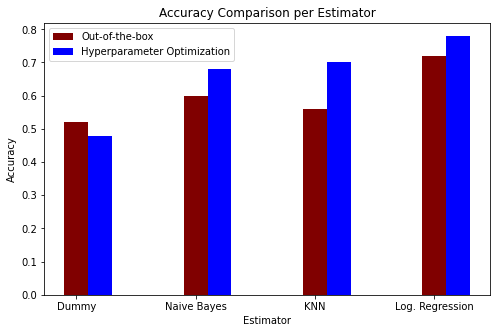

In [ ]:
# Get metrics from tuple (metric, train_time, test_time)
optimal_accs = [i[0] for i in evaluations1]
plot_comparison(optimal_accs, accuracies, title='Accuracy Comparison per Estimator')

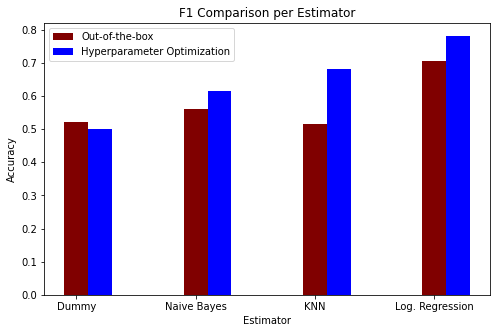

In [ ]:
optimal_f1s = [i[0]['f1-score'] for i in evaluations2]
plot_comparison(optimal_f1s, f1_scores, title='F1 Comparison per Estimator')

Τέλος, για τον καλύτερο και τον χειρότερο ταξινομητή (εξαιρουμένων των dummy) ως προς την ορθότητα εκτυπώνουμε τους πίνακες σύγχυσης (**confusion matrices**) με γραφικό τρόπο:

In [ ]:
def show_confusion_matrix(estimator, X_test, y_test, title):
  y_pred = estimator.predict(X_test)
  #Get the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
  plt.title(title)
  plt.show()

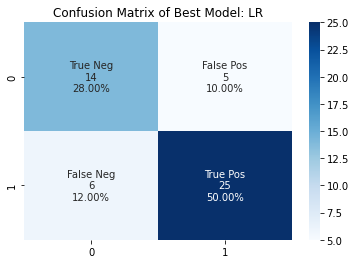

In [ ]:
show_confusion_matrix(best_lr1, X_test, y_test, 'Confusion Matrix of Best Model: LR')

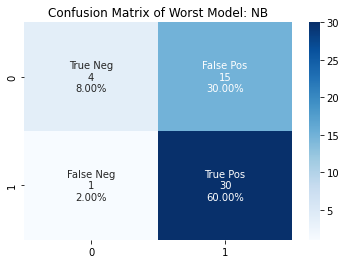

In [ ]:
show_confusion_matrix(best_nb1, X_test, y_test, 'Confusion Matrix of Worst Model: NB')

Παρατηρούμε ότι το χειρότερο μοντέλο, δηλαδή o Naive Bayes, έχει πολύ **περισσότερα False Positives (15) από False Negatives (1)**. Κάτι τέτοιο, σημαίνει ότι κατηγοριοποιεί πολλούς ασθενείς που κινδυνεύουν να πεθάνουν (label 0) ως ασθενείς που θα ζήσουν (label 1), κάτι το οποίο είναι απαγορευτικό! Αντιθέτως, το καλύτερο μοντέλο, δηλαδή ο LR Classifier, έχει ισορροπημένο αριθμό από false positives και false negatives.

Τελικώς, στο εν λόγω πρόβλημα κατηγοριοποίησης θα χρησιμοποιούσαμε έναν **Logistic Regression Classifier**, καθώς όχι μόνο δίνει τα καλύτερα αποτελέσματα και στις δύο μετρικές (accuracy & F1), αλλά επίσης έχει σχετικά μικρούς χρόνους εκτέλεσης τόσο για train όσο και για inference. Επιπλέον, δεν δίνει περισσότερα false positives, τα οποία θέλουμε να αποφύγουμε για ιατρικούς λόγους. Όπως αναφέρθηκε παραπάνω, η υπεροχή του LR οφείλεται κυρίως στο γεγονός ότι πρόκειται για ένα **Binary Classification Problem**, ενώ τα features των δειγμάτων δεν είναι πλήρως ανεξάρτητα μεταξύ τους, ώστε να προτιμηθεί ο NB.